In [59]:
from io import BytesIO
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Считайте данные из Google Sheets, при помощи библиотеки requests. Посчитайте процент мужчин среди всех посетителей сайта, округлите ответ до целых.

In [3]:
req = requests.get('https://docs.google.com/spreadsheets/d/1e3PRXmMNXo9AZZnaol1aHgYxtH6KYaCDymEQlK6jaO8/export?format=csv')
data = req.content


In [15]:
df = pd.read_csv(BytesIO(data))
df

,date,gender,users
0,2020-06-14,Not specified,150
1,2020-06-14,male,117
2,2020-06-14,female,21


In [31]:
int(df[df.gender == 'male'].users / df.users.sum() * 100)

C:\Users\фвьшт\AppData\Local\Temp\ipykernel_4684\1866355211.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(df[df.gender == 'male'].users / df.users.sum() * 100)


40

2. В списке lst находятся различные элементы. Создайте список new_list и сделайте следующее: <br>
•	при помощи конструкции try except и цикла попробуйте преобразовать каждое значение в листе в int <br>
•	если это получилось – добавьте преобразованное значение  в список new_listst


In [48]:
lst = [1, 'lol', '88005553535', '42.0', 295, -0.5, 0, None]
new_lst = []
for i in lst:
    try:
        new_lst.append(int(i))
    except:
        pass
print(new_lst)


[1, 88005553535, 295, 0, 0]


# Минипроект

## Формирование запросов к API Яндекс Метрики

Запрос состоит из URL Яндекс-Метрики + параметры запроса

In [385]:
# URL API Яндекс.Метрики
url = 'https://api-metrika.yandex.net/stat/v1/data'
# Параметры запроса

params_visitors = {
    'id': '44147844',                # ID счетчика
    'metrics': 'ym:s:visits',         # Количество визитов
    'dimensions': 'ym:s:date',
    'dimensions': 'ym:s:isRobot',  # Дата и тип пользователя (человек/робот)
}

In [379]:
# Вариант 1: указывать дату как фильтр, а не параметр, и отправлять запрос для каждой даты
dates = [date.strftime('%Y-%m-%d') for date in pd.date_range(start='2024-11-01', end='2024-11-07')]
data = []
for date in dates:
    params_visitors['filters'] = f"ym:s:date=='{date}'"
    visits_request = requests.get(url, params=params_visitors).json()
    for row in visits_request['data']:
        dimension = dict()
        dimension['date'] = date
        dimension['user_type'] = row['dimensions'][0]['name']
        dimension['visits'] = row['metrics'][0]
        data.append(dimension)
pd.DataFrame(data)

,date,user_type,visits
0,2024-11-01,People,332.0
1,2024-11-01,Robots,22.0
2,2024-11-02,People,242.0
3,2024-11-02,Robots,11.0
4,2024-11-03,People,183.0
5,2024-11-03,Robots,15.0
6,2024-11-04,People,335.0
7,2024-11-04,Robots,29.0
8,2024-11-05,People,409.0
9,2024-11-05,Robots,46.0


In [407]:
# Вариант 2 - указать диапазон дат как параметр запроса и получить все в одном запросе
params_browser = {
    'id': '44147844',                # ID счетчика
    'metrics': 'ym:s:visits',         # Количество визитов
    'date1': '2024-10-01',
    'date2': '2024-10-07',
    'dimensions': 'ym:s:date,ym:s:browser,ym:s:isRobot' # группировка по дате, браузеру, и типу пользователя(робот/человек)
}
# Пример возвращаемого словаря:
#{'dimensions': [{'name': '2024-10-03'}, - дата
#                {'icon_id': '6', 'icon_type': 'browser', 'name': 'Google Chrome', 'id': '6'}, - браузер
#                {'name': 'People', 'id': 'no'}], - робот/человек
# 'metrics': [205.0]}

In [421]:
browser_data = []
for dict in requests.get(url,params=params_browser).json()['data']:
    sample = {}
    sample['date'] = dict['dimensions'][0]['name']
    sample['browser'] = dict['dimensions'][1]['name']
    sample['user_type'] = dict['dimensions'][2]['name']
    sample['visits'] = dict['metrics'][0]
    browser_data.append(sample)

In [427]:
browser_df = pd.DataFrame(browser_data).sort_values('date')

In [433]:
browser_df.head()

,date,browser,user_type,visits
49,2024-10-01,Mobile Safari,People,9.0
16,2024-10-01,Chrome Mobile,Robots,33.0
77,2024-10-01,Samsung Internet,People,4.0
19,2024-10-01,Yandex Browser,People,29.0
21,2024-10-01,Safari,People,23.0


Настало время последнего мини-проекта в блоке Python! В нём вы поработаете с API и узнаете, как ведут себя пользователи на сайте Яндекс.Метрики.

1. Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. 

In [55]:
ya_df = pd.read_csv("https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv")
ya_df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


<Axes: xlabel='date', ylabel='visits'>

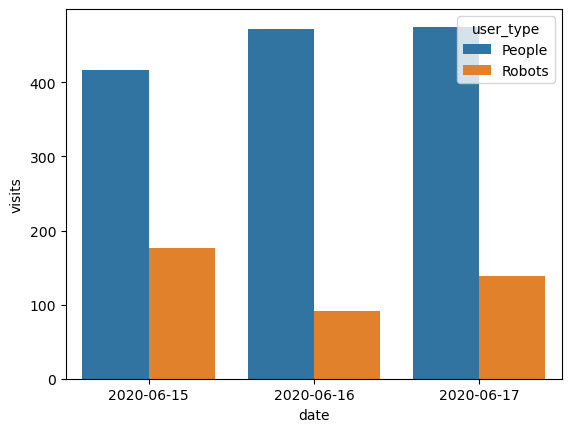

In [69]:
sns.barplot(data = ya_df, x = 'date', y ='visits', hue = 'user_type')

2. Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome

In [73]:
ya_df_2 = pd.read_csv("https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv")
ya_df_2.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [88]:
round((ya_df_2.loc[ya_df_2.browser == 'Google Chrome'].visits / ya_df_2.visits.sum() * 100).iloc[0])

60

3. Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?
В качестве ответа укажите название браузера.


In [91]:
ya_df_3 = pd.read_csv("https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv")
ya_df_3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [125]:
user_type_df = ya_df_3.groupby(['browser','user_type'], as_index = False).visits.sum() \
        .pivot(index = 'browser', columns = 'user_type', values = 'visits') \
        .fillna(0)
user_type_df['robots_percent'] = user_type_df.Robots / (user_type_df.People  + user_type_df.Robots)
user_type_df = user_type_df.sort_values('robots_percent', ascending = False)
user_type_df

user_type,People,Robots,robots_percent
browser,,,
UCWEB,0.0,4.0,1.000000
Safari,19.0,22.0,0.536585
Firefox,27.0,31.0,0.534483
Chromium,1.0,1.0,0.500000
Opera,11.0,5.0,0.312500
Google Chrome,250.0,104.0,0.293785
Edge,4.0,1.0,0.200000
Yandex Browser,47.0,7.0,0.129630
Samsung Internet,8.0,1.0,0.111111


4. Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.
В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.
Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.


In [134]:
# В датасете данные только за один день: 2020-06-15
ya_df_4 = pd.read_csv("https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv")
ya_df_4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [136]:
all_visits = ya_df_4.visits.sum()
all_visits

594.0

In [140]:
ya_df_4['percent_of_all_visits'] = ya_df_4.visits / all_visits * 100
ya_df_4.head()

,date,browser,user_type,visits,percent_of_all_visits
0,2020-06-15,Google Chrome,People,250.0,42.087542
1,2020-06-15,Google Chrome,Robots,104.0,17.508418
2,2020-06-15,Yandex Browser,People,47.0,7.912458
3,2020-06-15,Firefox,Robots,31.0,5.218855
4,2020-06-15,Chrome Mobile,People,31.0,5.218855


In [150]:
round(ya_df_4.query('browser == "Safari" & user_type == "People"').percent_of_all_visits.iloc[0],1)

3.2

4. При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. 

In [157]:
import gspread
from df2gspread import df2gspread as d2g # чтобы заливать пандас датафрейм
from oauth2client.service_account import ServiceAccountCredentials # чтобы авторизоваться в гугле

In [185]:
scope = ['https://spreadsheets.google.com/feeds',
 'https://www.googleapis.com/auth/drive']
path_to_json = '../../../custom-octagon-440914-e7-30f3313e3965.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_json, scope)
gs = gspread.authorize(credentials)


In [167]:
# Создание таблицы
sh = gc.create('project_7_4_data')

In [179]:
sh.share('vandynight@gmail.com', perm_type='user', role='writer')

<Response [200]>

In [171]:
# Получение листа таблицы
worksheet = sh.get_worksheet(0)

In [175]:
# Обновление данных в листе
worksheet.update([ya_df_4.columns.values.tolist()] + ya_df_4.values.tolist())

{'spreadsheetId': '1xFkjOqrLIlg4DizhAjrDCI_kJvKvj6z7hDizZHb9dXY',
 'updatedRange': 'Sheet1!A1:E25',
 'updatedRows': 25,
 'updatedColumns': 5,
 'updatedCells': 125}

In [181]:
# Получение ссылки на лист
link = sh.url
link

'https://docs.google.com/spreadsheets/d/1xFkjOqrLIlg4DizhAjrDCI_kJvKvj6z7hDizZHb9dXY'

5. Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People. <br>
В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)


In [201]:
from io import BytesIO
import requests

In [214]:
# Получение данных другого аналитика
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [220]:
df = df.rename(columns={'users':'visits'})
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [209]:
ya_df_5 = pd.read_csv("https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv")
ya_df_5.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [232]:
# Объединение данных в одну таблицу
all_data = pd.concat([df,ya_df_5])
all_data = all_data.reset_index(drop = True)

In [259]:
user_type_df = all_data.groupby(['browser','user_type'], as_index = False).visits.sum() \
        .pivot(index = 'browser',columns = 'user_type', values = 'visits').fillna(0)
user_type_df['all_visits'] = user_type_df.People + user_type_df.Robots
user_type_df['bot_visit_per_user'] = user_type_df.all_visits / user_type_df.People
user_type_df

user_type,People,Robots,all_visits,bot_visit_per_user
browser,,,,
Android Browser,2.0,0.0,2.0,1.000000
Chrome Mobile,61.0,0.0,61.0,1.000000
Chromium,2.0,2.0,4.0,2.000000
CocCoc,2.0,0.0,2.0,1.000000
Edge,8.0,2.0,10.0,1.250000
Firefox,53.0,60.0,113.0,2.132075
Google Chrome,490.0,208.0,698.0,1.424490
Mobile Safari,29.0,2.0,31.0,1.068966
Opera,21.0,10.0,31.0,1.476190


# Дополнительный минипроект

В рамках дополнительного проекта попробуем освоить API, позволяющий получать данные о музейных коллекциях. Это задание может пригодиться для большего понимания того, какими способами можно собирать и обрабатывать данные, например, для собственного проекта или другой рабочей задачи. Также вы можете более глубоко изучить документацию, чтобы потом исследовать другие интересные для себя вопросы по полученным данным :)

Документация API музея: https://metmuseum.github.io/

In [545]:
# Ссылки для запросов
url = 'https://collectionapi.metmuseum.org/' # базовая ссылка
objects = url + 'public/collection/v1/objects'
departments = url + 'public/collection/v1/departments'
search = url + 'public/collection/v1/search'

1. Предположим, ваша задача – найти все произведения, связанные с подсолнухами. Выполните поиск по слову "sunflowers". Внимательно посмотрите на формат ответа и сохраните id полученных объектов в список sunflower_ids.

In [463]:
query = '?q=sunflowers'

In [473]:
sf_request = requests.get(search+query)
sf_data = sf_request.json() # получить ID подсолнухов


In [481]:
sf_ids = sf_data['objectIDs'] # список с ID подсолнухов

In [503]:
len(sf_ids)

96

2. Отлично! На предыдущем шаге мы получили результаты поиска. Следущий этап – собрать информацию об этих объектах. <br>
Выполните запрос для объекта 437980 <br>

In [485]:
object_id = 437980

In [489]:
obj_request = requests.get(objects + f'/{object_id}')
obj_data = obj_request.json()

In [499]:
obj_data

{'objectID': 437980,
 'isHighlight': False,
 'accessionNumber': '49.30',
 'accessionYear': '1949',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/DP130999.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DP130999.jpg',
 'additionalImages': [],
 'constituents': [{'constituentID': 161947,
   'role': 'Artist',
   'name': 'Vincent van Gogh',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500115588',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q5582',
   'gender': ''}],
 'department': 'European Paintings',
 'objectName': 'Painting',
 'title': 'Cypresses',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Vincent van Gogh',
 'artistDisplayBio': 'Dutch, Zundert 1853–1890 Auvers-sur-Oise',
 'artistSuffix': '',
 'artistAlphaSort': 'Gogh, Vincent van',
 'artistNationality': 'Dutch',
 'artistB

3. Теперь напишите цикл, с помощью которого будет собрана информация об объектах, которые были получены на 2 шаге. Результаты запишите в датафрейм, а именно – следующие параметры: <br>
	 objectID – id объекта <br>
	title – название <br>
	artistDisplayName – автор <br>
	department – департамент <br>
	objectBeginDate – дата (начало) <br>
	objectEndDate – дата (конец) <br>
	period – название периода <br>
	objectName – название/категория объекта <br>
	culture – культура <br>

In [507]:
sf_data = []
for object_id in sf_ids:
    request = requests.get(objects + f'/{object_id}')
    obj_data = request.json()
    # словарь, который будет представлять строчку в датафрейме
    try:
        sample = {'object_id': obj_data['objectID'],
              'title' : obj_data['title'],
              'artist_diplay_name' : obj_data['artistDisplayName'],
              'department' : obj_data['department'],
              'object_begin_date' : obj_data['objectBeginDate'],
              'object_end_date' : obj_data['objectEndDate'],
              'period' : obj_data['period'],
              'object_name' : obj_data['objectName'],
              'culture' : obj_data['culture']
             } 
        sf_data.append(sample)
    except:
        pass
    
sf_data

[{'object_id': 436524,
  'title': 'Sunflowers',
  'artist_diplay_name': 'Vincent van Gogh',
  'department': 'European Paintings',
  'object_begin_date': 1887,
  'object_end_date': 1887,
  'period': '',
  'object_name': 'Painting',
  'culture': ''},
 {'object_id': 484935,
  'title': 'Sunflowers',
  'artist_diplay_name': 'Edward McKnight Kauffer',
  'department': 'Modern and Contemporary Art',
  'object_begin_date': 1921,
  'object_end_date': 1921,
  'period': '',
  'object_name': 'Painting',
  'culture': ''},
 {'object_id': 437112,
  'title': 'Bouquet of Sunflowers',
  'artist_diplay_name': 'Claude Monet',
  'department': 'European Paintings',
  'object_begin_date': 1881,
  'object_end_date': 1881,
  'period': '',
  'object_name': 'Painting',
  'culture': ''},
 {'object_id': 210191,
  'title': 'Vase with sunflowers',
  'artist_diplay_name': 'Rozenburg Plateelfabriek',
  'department': 'European Sculpture and Decorative Arts',
  'object_begin_date': 1896,
  'object_end_date': 1896,
  'per

In [517]:
sf_df = pd.DataFrame(sf_data)
sf_df.head()

,object_id,title,artist_diplay_name,department,object_begin_date,object_end_date,period,object_name,culture
0,436524,Sunflowers,Vincent van Gogh,European Paintings,1887,1887,,Painting,
1,484935,Sunflowers,Edward McKnight Kauffer,Modern and Contemporary Art,1921,1921,,Painting,
2,437112,Bouquet of Sunflowers,Claude Monet,European Paintings,1881,1881,,Painting,
3,210191,Vase with sunflowers,Rozenburg Plateelfabriek,European Sculpture and Decorative Arts,1896,1896,,Vase,
4,431264,Sunflowers,Lily Converse,Drawings and Prints,1941,1941,,Print,


4. Сколько объектов относятся к японской культуре? (culture –Japan)

In [515]:
sf_df.culture.value_counts()

culture
                    77
American            10
Japan                1
British              1
Ancestral Pueblo     1
China                1
Name: count, dtype: int64

6. Теперь попробуем построить более сложный запрос с помощью секции "Search"! На этот раз параметры необходимо передать через "&", например, departmentId (id департамента – 1) и q (ключевое слово – cat):

In [535]:
req = requests.get(search + '?departmentId=1&q=cat')
department_ids = req.json()['objectIDs']

In [537]:
department_ids

[19360,
 834757,
 13328,
 19363,
 13576,
 12915,
 15590,
 10210,
 13647,
 12272,
 14889,
 14884,
 11523,
 12940,
 12578,
 15051,
 14924,
 284,
 2379,
 10837,
 11040,
 10813,
 13761,
 10159,
 12855,
 195467,
 11609,
 5594,
 11300,
 11299,
 16748,
 764089,
 16976,
 14875,
 11016,
 5263,
 11730,
 14447,
 214310]

Выполните поисковый запрос для департамента "Asian art" (departmentId = 1) с тегом "cat" и запишите id объектов в cat_ids. Используйте цикл из шага 4, чтобы получить данные об объектах из списка.

In [553]:
dep_data = []
for object_id in department_ids:
    request = requests.get(objects + f'/{object_id}')
    obj_data = request.json()
    # словарь, который будет представлять строчку в датафрейме
    try:
        sample = {'object_id': obj_data['objectID'],
              'title' : obj_data['title'],
              'artist_diplay_name' : obj_data['artistDisplayName'],
              'department' : obj_data['department'],
              'object_begin_date' : obj_data['objectBeginDate'],
              'object_end_date' : obj_data['objectEndDate'],
              'period' : obj_data['period'],
              'object_name' : obj_data['objectName'],
              'culture' : obj_data['culture']
             } 
        dep_data.append(sample)
    except:
        pass
    
pd.DataFrame(dep_data)

,object_id,title,artist_diplay_name,department,object_begin_date,object_end_date,period,object_name,culture
0,19360,Spotted Cat,Bill Traylor,The American Wing,1936,1945,,Drawing,American
1,834757,Cat quilt,Unknown,The American Wing,1845,1855,,Quilt,American
2,13328,The Watchful Cat,John Alonzo Williams,The American Wing,1869,1947,,Watercolor,American
3,13576,Embroidered Carpet,Zeruah H. Guernsey Caswell,The American Wing,1832,1835,,Carpet,American
4,12915,"Interior Scene with Old Woman, Young Girl, and...",,The American Wing,1800,1900,,Drawing,American
5,15590,Stalking Panther,Alexander Phimister Proctor,The American Wing,1891,1892,,Sculpture,American
6,10210,Emma Homan,John Bradley,The American Wing,1841,1844,,Painting,American
7,13647,"Quilt Top, Crazy pattern",,The American Wing,1882,1888,,Quilt,American
8,12272,Two Cats,John Singer Sargent,The American Wing,1880,1880,,Drawing,American
9,14889,Cat; Seated Woman Leaning on a Table or Ledge ...,Francis William Edmonds,The American Wing,1835,1839,,Drawing,American
